In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library("dplyr")
library("foreign")
library("data.table")
library("car")
library(semPlot)
library(lavaan)
library(factoextra)

Warning message:
"package 'dplyr' was built under R version 4.3.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.3.2"
Warning message:
"package 'reshape2' was built under R version 4.3.2"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths



Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'car' was built under R version 4.3.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Warning message:
"package 'semPlot' was built under R version 4.3.2"
Warning message:
"package 'factoex

In [3]:
data <- read_csv("cleanest_of_datas.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "Commuting", "WorkEfficiency", "Housework", "FamilyTime",
  "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "InterpersonalRelationships", "SocialIsolation", "Sleep",
  "EconomicResources", "RemoteWorkCompatability", "Motivation",
  "PhysicalEnvironment", "Wellbeing", "MentalHealth", "PhysicalHealth",
  "Sociability"
)

In [ ]:
# scree.plot(data[numeric_columns])

ERROR: Error in scree.plot(data[numeric_columns]): could not find function "scree.plot"


In [7]:
library("psych")
library("psy")
library("tidyverse") 

correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

data <- na.omit(data)


pr_ititial <- principal(correlation_matrix,
    nfactors = 7,
    rotate = "varimax"
)
# h2 - communalities
print(pr_ititial$Structure, digits=3, cutoff = 0.4, sort = T)

Warning message:
"package 'psych' was built under R version 4.3.2"

Attaching package: 'psych'


The following object is masked from 'package:car':

    logit


The following objects are masked from 'package:ggplot2':

    %+%, alpha


The following object is masked from 'package:lavaan':

    cor2cov



Attaching package: 'psy'


The following object is masked from 'package:psych':

    wkappa


Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'lubridate' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ lubridate 1.9.3     ✔ stringr   1.5.0
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ psych::%+%()          masks ggplot2::%+%()
✖ psych::alpha()        masks ggplot2::alpha()
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks d


Loadings:
                           RC1    RC2    RC7    RC5    RC3    RC4    RC6   
SocialIsolation             0.767                                          
EconomicResources           0.727                                          
RemoteWorkCompatability     0.726                                          
Motivation                  0.753                                          
PhysicalEnvironment         0.801                                          
Wellbeing                   0.782                                          
Productivity                       0.710                                   
MentalHealth                       0.812                                   
PhysicalHealth                     0.790                                   
RemoteWorkExtent                          0.804                            
RemoteWorkSupport                         0.854                            
Commuting                                        0.926                     
W

In [12]:
library(lavaan)

model <- '
  RemoteWorkChallenges =~ RemoteWorkCompatability + Motivation + WorkEfficiency 
  WorkOutcomes =~  MentalHealth + PhysicalHealth 
  RemoteWorkOrganization =~ RemoteWorkExtent + RemoteWorkSupport + RemoteWorkCompatability 
  WorkLifeBalance =~ Commuting + FamilyTime + RemoteWorkExtent +  Motivation 
  FamilyStage =~ Age + Commuting + WorkEfficiency + FamilyTime 
  PerformanceEfficiency =~ WorkEfficiency + FamilyTime + Motivation
  HolisticResources =~ MentalHealth + PhysicalEnvironment 

  # Structural Model
  # Direct Effects
  MentalHealth ~ RemoteWorkChallenges + WorkLifeBalance + PerformanceEfficiency  
  
  # Indirect Effects (optional)
  WorkOutcomes ~ RemoteWorkChallenges + RemoteWorkOrganization + WorkLifeBalance + HolisticResources + FamilyStage
  
  # Covariances
  WorkOutcomes ~~ RemoteWorkChallenges
  PerformanceEfficiency ~~ WorkLifeBalance
  RemoteWorkChallenges ~~ Commuting
'

fit <- sem(model, data = data[numeric_columns])

chisq_value <- fitMeasures(fit, "chisq")
df <- fitMeasures(fit, "df")
p_value <- fitMeasures(fit, "pvalue")

# Print the results
cat("Chi-square value:", chisq_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

summary(fit, fit.measures = TRUE)

varTable(fit)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."
Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"
Warning message in lav_object_post_check(object):
"lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use lavInspect(fit, "cov.lv") to investigate."


Chi-square value: 12.89799 
Degrees of freedom: 9 
P-value: 0.1672766 


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RemoteWorkChallenges,=~,RemoteWorkCompatability,0,1.000000000,0,NA,NA
RemoteWorkChallenges,=~,Motivation,0,2.119843596,NA,NA,NA
RemoteWorkChallenges,=~,WorkEfficiency,0,0.404078357,NA,NA,NA
WorkOutcomes,=~,MentalHealth,0,1.000000000,0,NA,NA
WorkOutcomes,=~,PhysicalHealth,0,0.102952728,NA,NA,NA
RemoteWorkOrganization,=~,RemoteWorkExtent,0,1.000000000,0,NA,NA
RemoteWorkOrganization,=~,RemoteWorkSupport,0,0.294178336,NA,NA,NA
RemoteWorkOrganization,=~,RemoteWorkCompatability,0,-0.016361077,NA,NA,NA
WorkLifeBalance,=~,Commuting,0,1.000000000,0,NA,NA


,name,idx,nobs,type,exo,user,mean,var,nlev,lnam
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,RemoteWorkCompatability,14,1454,numeric,0,0,3.3321871,2.460120,0,
2,Motivation,15,1454,numeric,0,0,3.7056396,2.198220,0,
3,WorkEfficiency,4,1454,numeric,0,0,0.2620358,2.707629,0,
4,MentalHealth,18,1454,numeric,0,0,3.7255846,1.078808,0,
5,PhysicalHealth,19,1454,numeric,0,0,3.5990371,1.294727,0,
6,RemoteWorkExtent,7,1454,numeric,0,0,3.5867435,2.915034,0,
7,RemoteWorkSupport,8,1454,numeric,0,0,4.2900619,1.119222,0,
8,Commuting,3,1454,numeric,0,0,-1.0854333,2.737365,0,
9,FamilyTime,6,1454,numeric,0,0,0.4761279,2.558425,0,


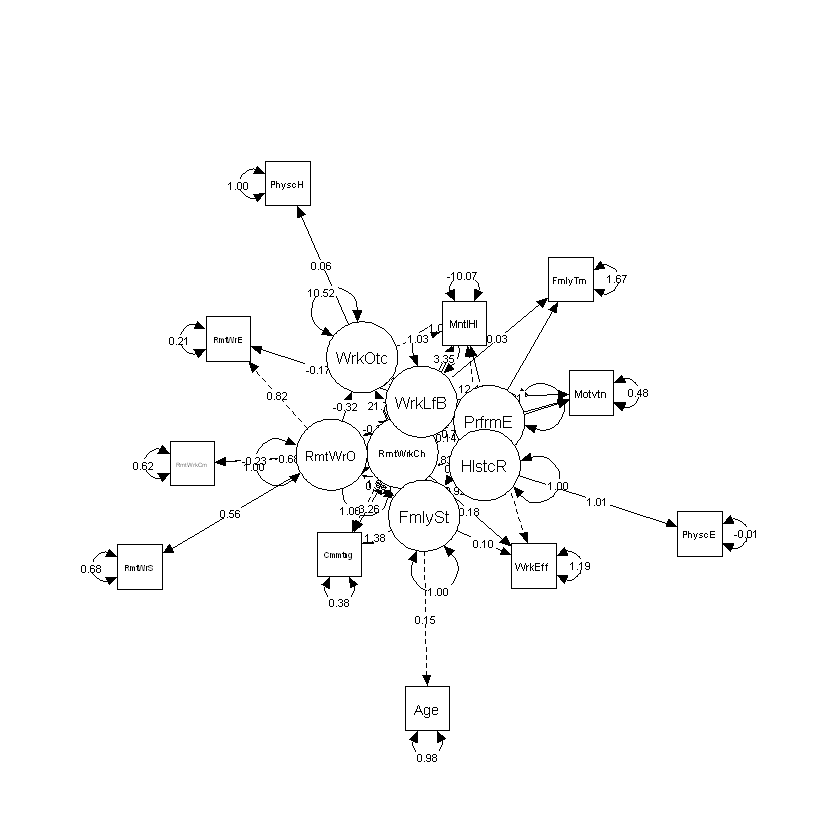

In [ ]:
library(semPlot)

semPaths(fit, whatLabels = "std", layout = "spring", edge.color = "black", 
         title = TRUE, nCharNodes = 6)